In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import tensorflow_datasets as tfds
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

Loading network without freezing

In [2]:
model = tf.keras.models.load_model("ex9_cifar10_triplet_loss.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
Total params: 130,176
Trainable params: 130,176
Non-trainable params: 0
__________________________________________________

In [3]:
def _normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)

train_dataset, test_dataset = tfds.load(name="cifar10", split=['train', 'test'], as_supervised=True)

# Build your input pipelines
train_dataset = train_dataset.shuffle(1024).batch(32)
train_dataset = train_dataset.map(_normalize_img).map(lambda x, y: (x, tf.one_hot(y, depth=10)))

test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.map(_normalize_img).map(lambda x, y: (x, tf.one_hot(y, depth=10)))

In [4]:
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_dataset,
    epochs=10,
    batch_size = 128,
    validation_data = test_dataset
)


Epoch 1/10
   1/1563 [..............................] - ETA: 0s - loss: 3.8830 - accuracy: 0.1250WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0050s vs `on_train_batch_end` time: 0.0100s). Check your callbacks.


1563/1563 [==============================] - 19s 12ms/step - loss: 1.4868 - accuracy: 0.4884 - val_loss: 1.4074 - val_accuracy: 0.5306
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0337 - accuracy: 0.6301 - val_loss: 1.0586 - val_accuracy: 0.6298
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8133 - accuracy: 0.7111 - val_loss: 1.1375 - val_accuracy: 0.6394
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6114 - accuracy: 0.7831 - val_loss: 1.3569 - val_accuracy: 0.6227
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.4273 - accuracy: 0.8496 - val_loss: 1.6931 - val_accuracy: 0.6064
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.3074 - accuracy: 0.8932 - val_loss: 2.1427 - val_accuracy: 0.5885
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.2383 - accuracy: 0.9186 - val_loss: 2.1867 - val_accura

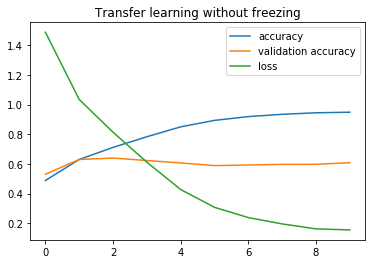

In [8]:
import matplotlib.pyplot as plt
plt.title('Transfer learning without freezing')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='upper right')

Randomly initialized weights

In [9]:
model_random = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [10]:
model_random.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_random = model_random.fit(
    train_dataset,
    epochs=10,
    batch_size = 128,
    validation_data = test_dataset
)


Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5890 - accuracy: 0.4219 - val_loss: 1.3040 - val_accuracy: 0.5272
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1784 - accuracy: 0.5776 - val_loss: 1.0833 - val_accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0231 - accuracy: 0.6387 - val_loss: 0.9950 - val_accuracy: 0.6501
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9364 - accuracy: 0.6680 - val_loss: 1.0278 - val_accuracy: 0.6456
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8647 - accuracy: 0.6954 - val_loss: 0.9192 - val_accuracy: 0.6765
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8121 - accuracy: 0.7138 - val_loss: 0.9487 - val_accuracy: 0.6792
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7537 - accuracy: 0.7327 - val_loss: 0.9004 - val_accuracy:

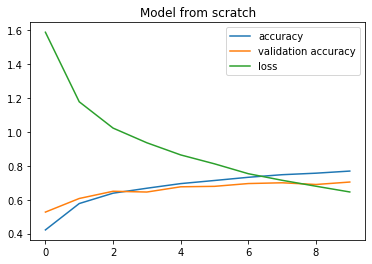

In [11]:
import matplotlib.pyplot as plt
plt.title('Model from scratch')
plt.plot(history_random.history['accuracy'], label='accuracy')
plt.plot(history_random.history['val_accuracy'], label='validation accuracy')
plt.plot(history_random.history['loss'], label='loss')
plt.legend(loc='upper right')

In [12]:
model_frozen = tf.keras.models.load_model("ex9_cifar10_triplet_loss.h5")

for layer in model_frozen.layers:
    layer.trainable = False
model_frozen.add(Dense(64, activation='relu'))
model_frozen.add(Dense(10, activation='softmax'))

In [13]:
model_frozen.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_frozen = model_frozen.fit(
    train_dataset,
    epochs=10,
    batch_size = 128,
    validation_data = test_dataset
)



Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.2866 - accuracy: 0.1745 - val_loss: 1.9963 - val_accuracy: 0.1931
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9232 - accuracy: 0.1970 - val_loss: 1.8893 - val_accuracy: 0.2084
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8564 - accuracy: 0.2145 - val_loss: 1.8477 - val_accuracy: 0.2211
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8246 - accuracy: 0.2316 - val_loss: 1.8637 - val_accuracy: 0.2289
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8083 - accuracy: 0.2426 - val_loss: 1.8195 - val_accuracy: 0.2408
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7923 - accuracy: 0.2503 - val_loss: 1.8072 - val_accuracy: 0.2816
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7850 - accuracy: 0.2587 - val_loss: 1.7787 - val_accuracy:

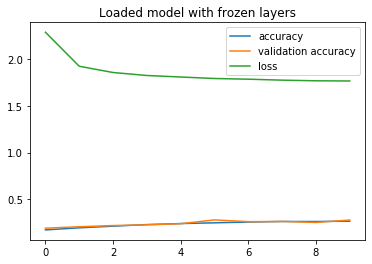

In [14]:
plt.title('Loaded model with frozen layers')
plt.plot(history_frozen.history['accuracy'], label='accuracy')
plt.plot(history_frozen.history['val_accuracy'], label='validation accuracy')
plt.plot(history_frozen.history['loss'], label='loss')
plt.legend(loc='upper right')